In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib

In [14]:
import seaborn as sns

In [3]:
import numpy as np

In [3]:
df=pd.read_csv('../output/ZJS0925_A1/analysis/P1BC_ATAC_analysis_summary.csv',header=None)

In [4]:
def read_summary(indir,datatype,samples):
    df=pd.DataFrame()
    for sample in samples:
        sumdf=pd.read_csv(indir+'/analysis/%s_%s_analysis_summary.csv'%(sample,datatype), header=None).T
        df=df.append(sumdf.iloc[1])
    df.columns=sumdf.iloc[0]
    df["sample"]=samples
    return df

# ZJS0808

In [6]:
samples_a=['F5A','F7A','F9A','F10A']
atac=read_summary('../output/ZJS190808_A/','ATAC',samples_a)

In [8]:
samples_r=['F5R','F7R','F9R','F10R']
rna=read_summary('../output/ZJS190905_R/','RNA',samples_r)

In [18]:
df_merge=atac.append(rna)
df_merge['type']=['ATAC']*4+['RNA']*4
df_merge['samples']=['F5','F7','F9','F10']*2

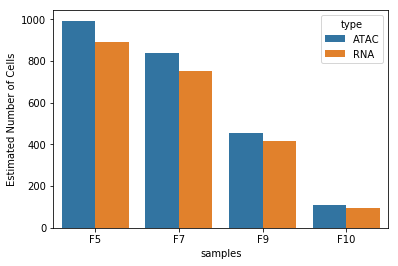

In [19]:
sns.barplot(x="samples", y="Estimated Number of Cells", hue="type", data=df_merge)

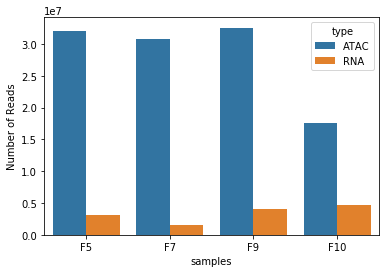

In [20]:
ax = sns.barplot(x="samples", y="Number of Reads", hue="type", data=df_merge)

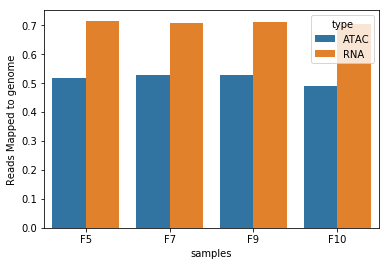

In [21]:
 sns.barplot(x="samples", y="Reads Mapped to genome", hue="type", data=df_merge)

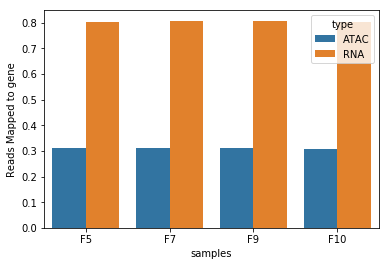

In [22]:
ax = sns.barplot(x="samples", y="Reads Mapped to gene", hue="type", data=df_merge)

In [24]:
def get_bc_umi(cell_file):
    bc_umi={}
    with open(cell_file) as input:
        input.readline()
        for line in input:
            items=line.rstrip('\n').split(',')
            bc=items[0].split('_')[1]
            counts=items[-2]
            bc_umi.setdefault(bc,0)
            bc_umi[bc]=float(counts)
    return bc_umi.values()

def get_bc_genes(cell_file):
    bc_umi={}
    with open(cell_file) as input:
        input.readline()
        for line in input:
            items=line.rstrip('\n').split(',')
            bc=items[0].split('_')[1]
            counts=items[-1]
            bc_umi.setdefault(bc,0)
            bc_umi[bc]=float(counts)
    return bc_umi.values()

def get_umi(indir,datatype,samples):
    df=pd.DataFrame()
    for sample in samples:
        df0=pd.DataFrame()
        umis=get_bc_umi(indir+'/DGE_filtered/%s_%s_cell_metadata.csv'%(sample,datatype))
        df0['umis']=umis
        df0['samples']=sample
        df0['type']=datatype
        df=df.append(df0)
    return df

def get_umi_gene(indir,datatype,samples):
    df=pd.DataFrame()
    for sample in samples:
        df0=pd.DataFrame()
        umis=get_bc_umi(indir+'/DGE_filtered/%s_%s_cell_metadata.csv'%(sample,datatype))
        genes=get_bc_genes(indir+'/DGE_filtered/%s_%s_cell_metadata.csv'%(sample,datatype))
        df0['umis']=umis
        df0['genes']=genes
        df0['samples']=sample
        df0['type']=datatype
        df=df.append(df0)
    return df

In [ ]:
df_A=get_umi('../output/ZJS190808_A/','ATAC',samples_a)
df_R=get_umi('../output/ZJS190905_R/','RNA',samples_r)

In [25]:
df_R=get_umi_gene('../output/ZJS190905_R/','RNA',samples_r)

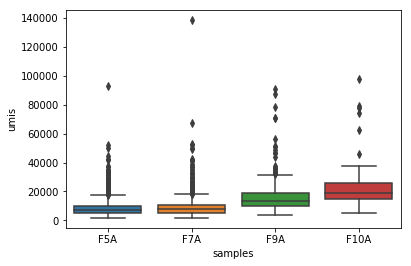

In [16]:
sns.boxplot(x="samples", y="umis", data=df_A)

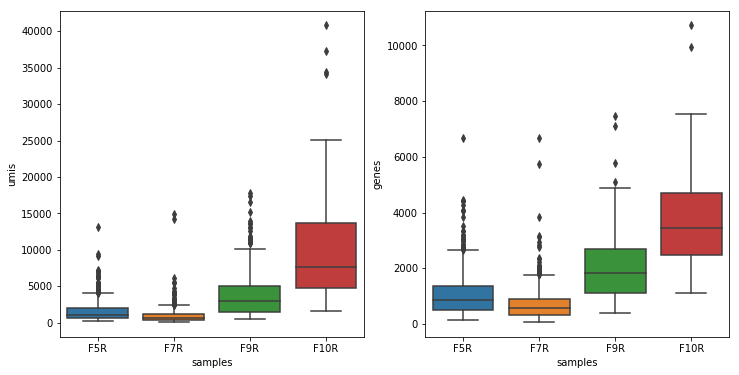

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.boxplot(x="samples", y="umis", data=df_R, ax=ax[0])
sns.boxplot(x="samples", y="genes", data=df_R, ax=ax[1])

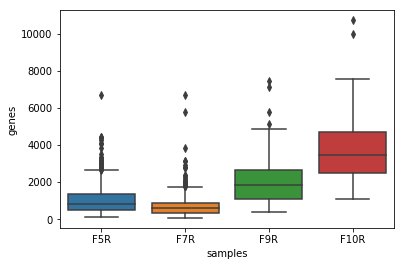

In [26]:
sns.boxplot(x="samples", y="genes", data=df_R)

In [ ]:
s0826=['P1BC','P1TC','P1SC','P1MN','P1CTC']
s0823_2=['P2BC','P2TC','P2SC','P2MN','P2CTC','P2LC']
s0625=['P1BC','P1TC','P1SC','P1MN','P1CTC']
s0823_1=['P2BC','P2TC','P2SC','P2MN','P2CTC']

In [8]:
atac1=read_summary('../output/ZJS0925_A1/','ATAC',s0826)
atac2=read_summary('../output/ZJS0925_A1/','ATAC',s0823_2)
atac3=read_summary('../output/ZJS0925_A2/','ATAC',s0625)
atac4=read_summary('../output/ZJS0925_A2/','ATAC',s0823_1)
atac1['Patient']=['s0826']*len(s0826)
atac2['Patient']=['s0823_2']*len(s0823_2)
atac3['Patient']=['s0625']*len(s0625)
atac4['Patient']=['s0823_1']*len(s0823_1)
atac=atac1.append(atac2).append(atac3).append(atac4)
atac['Tissue']=atac['sample'].apply(lambda x: x[2:])

In [39]:
s0826=['P1TC','P1SC','P1MN','P1CTC']
s0823_2=['P2BC','P2TC','P2SC','P2MN','P2CTC','P2LC']
s0625=['P1BC','P1TC','P1SC','P1MN','P1CTC']
s0823_1=['P2BC','P2TC','P2SC','P2MN','P2CTC']
rna1=read_summary('../output/ZJS0930_R1/','RNA',s0826)
rna2=read_summary('../output/ZJS0930_R1/','RNA',s0823_2)
rna3=read_summary('../output/ZJS0930_R2/','RNA',s0625)
rna4=read_summary('../output/ZJS0930_R2/','RNA',s0823_1)
rna=rna1.append(rna2).append(rna3).append(rna4)
rna['Patient']=['s0826']*len(s0826)+['s0823_2']*len(s0823_2)+['s0625']*len(s0625)+['s0823_1']*len(s0823_1)
rna['Tissue']=rna['sample'].apply(lambda x: x[2:])

In [9]:
atac

,Estimated Number of Cells,hg Number of Cells Detected,hg Median UMIs/Cell,hg Median Genes/Cell,Mean Reads/Cell,Number of Reads,Sequencing Saturation,Reads Mapped to rRNA,Reads Mapped to mt-rRNA,Reads Mapped to genome,Reads Mapped to gene,Fraction Reads in Cells,hg Fraction Reads in Cells,hg Exonic Fraction,sample,Patient,Tissue
1,293.0,293.0,8.0,3.0,2.537270e+02,74342.0,0.768695,0.003968,0.020338,0.284025,0.331991,0.697789,0.697789,0.018779,P1BC,s0826,BC
1,454.0,454.0,1032.5,300.0,2.016894e+04,9156699.0,0.817226,0.011776,0.033654,0.647819,0.316124,0.952259,0.952259,0.052617,P1TC,s0826,TC
1,48.0,48.0,2122.0,595.5,3.175229e+04,1524110.0,0.793173,0.014459,0.074423,0.456500,0.333062,0.930160,0.930160,0.057176,P1SC,s0826,SC
1,1.0,1.0,39533.0,5231.0,3.718700e+05,371870.0,0.801557,0.002385,0.008315,0.698300,0.293761,0.767169,0.767169,0.018668,P1MN,s0826,MN
1,1294.0,1294.0,3895.5,966.5,6.290325e+04,81396808.0,0.816239,0.006139,0.024713,0.723023,0.305202,0.959773,0.959773,0.030534,P1CTC,s0826,CTC
1,18.0,18.0,942.0,295.0,2.478911e+04,446204.0,0.796458,0.031797,0.052848,0.338390,0.335119,0.803111,0.803111,0.080139,P2BC,s0823_2,BC
1,10.0,10.0,76.0,21.0,5.853400e+03,58534.0,0.774111,0.007688,0.014778,0.274388,0.322209,0.202315,0.202315,0.008174,P2TC,s0823_2,TC
1,67.0,67.0,934.0,238.0,3.917219e+04,2624537.0,0.865486,0.007558,0.023181,0.693529,0.298541,0.966554,0.966554,0.038322,P2SC,s0823_2,SC
1,1.0,1.0,2886.0,818.0,2.133940e+05,213394.0,0.781101,0.008590,0.019766,0.193056,0.332791,0.320027,0.320027,0.064449,P2MN,s0823_2,MN
1,1171.0,1171.0,3247.0,871.0,4.970297e+04,58202175.0,0.832877,0.009961,0.029174,0.705061,0.315808,0.957248,0.957248,0.044686,P2CTC,s0823_2,CTC


In [49]:
def dotplot(df, tissue_labels, patient_labels):
    x=df['Tissue'].apply(lambda x: tissue_labels.index(x))
    y=df['Patient'].apply(lambda x: patient_labels.index(x))
    cells=df['Estimated Number of Cells']
    umis=df['hg Median UMIs/Cell']
    umis=np.log2(np.array(umis))
    cmap = matplotlib.cm.get_cmap('YlGnBu')
    normalize = matplotlib.colors.Normalize(min(umis), max(umis))
    colors = [cmap(normalize(value)) for value in umis]
    fig = plt.figure(figsize=(10,4), dpi=200)
    ax=fig.add_subplot(1, 2, 1)
    ax.scatter(x, y, color=colors, s=cells, edgecolor='none')
    ax.set_xticks(range(len(tissue_labels)))
    ax.set_xticklabels(tissue_labels)
    ax.set_yticks(range(len(patient_labels)))
    ax.set_yticklabels(patient_labels)
    cax, _ = matplotlib.colorbar.make_axes(ax)
    cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax+0.5)
    
    # add size legend
    size = range(0, 2000, 400)
    size_legend=fig.add_subplot(1, 2, 2)
    size_legend.scatter(np.repeat(0, len(size)), range(len(size)), s=size)
    size_legend.set_yticks(range(len(size)))
    size_legend.set_yticklabels(size)
    size_legend.tick_params(axis='x', bottom=False, labelbottom=False)
    size_legend.spines['right'].set_visible(False)
    size_legend.spines['top'].set_visible(False)
    size_legend.spines['left'].set_visible(False)
    size_legend.spines['bottom'].set_visible(False)
    ymin, ymax = size_legend.get_ylim()
    size_legend.set_ylim(ymin, ymax+0.5)

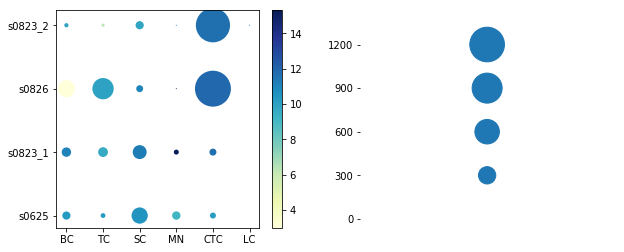

In [36]:
tissue_labels=['BC','TC','SC','MN','CTC','LC']
patient_labels=['s0625','s0823_1','s0826','s0823_2']

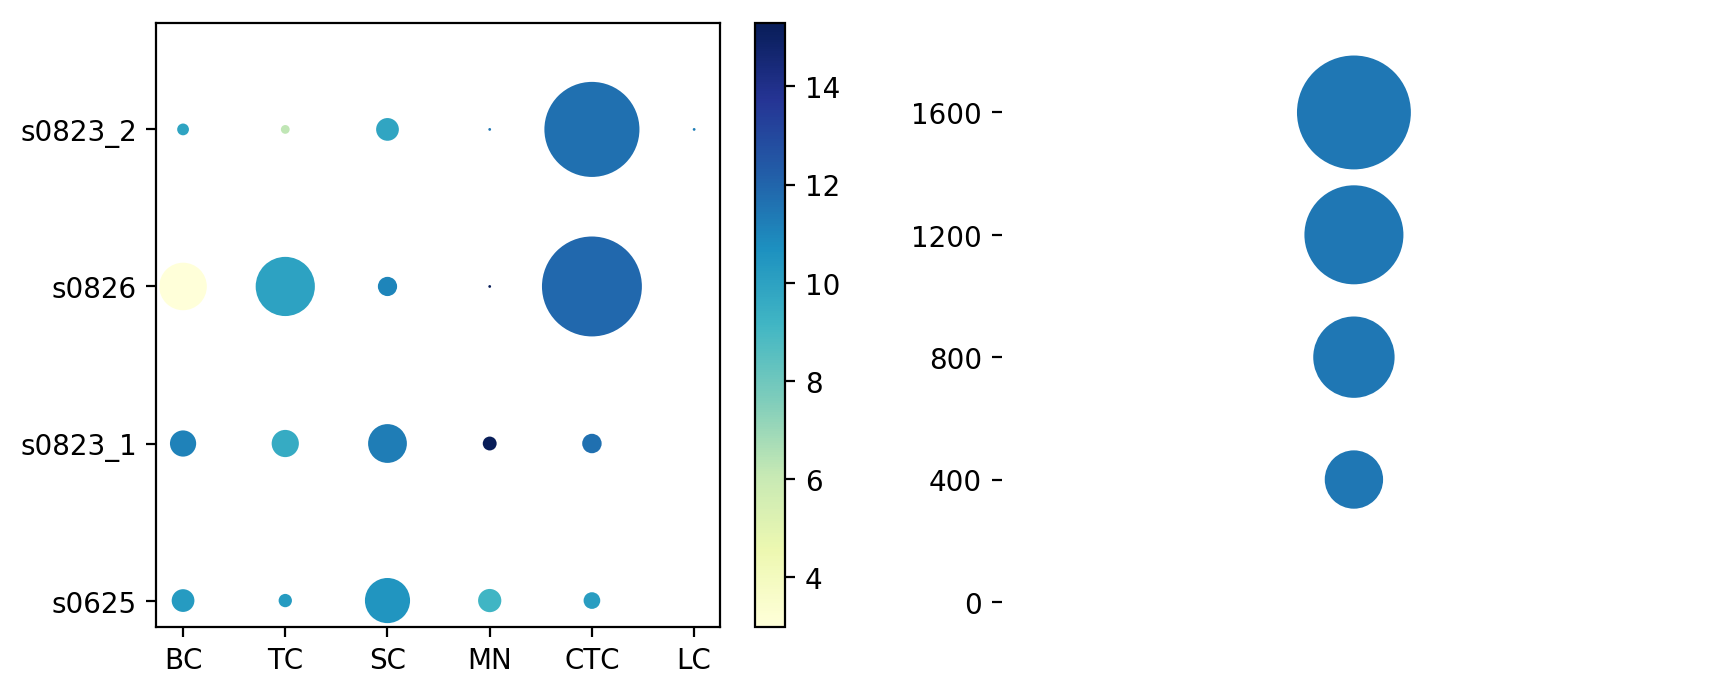

In [50]:
dotplot(atac, tissue_labels, patient_labels)

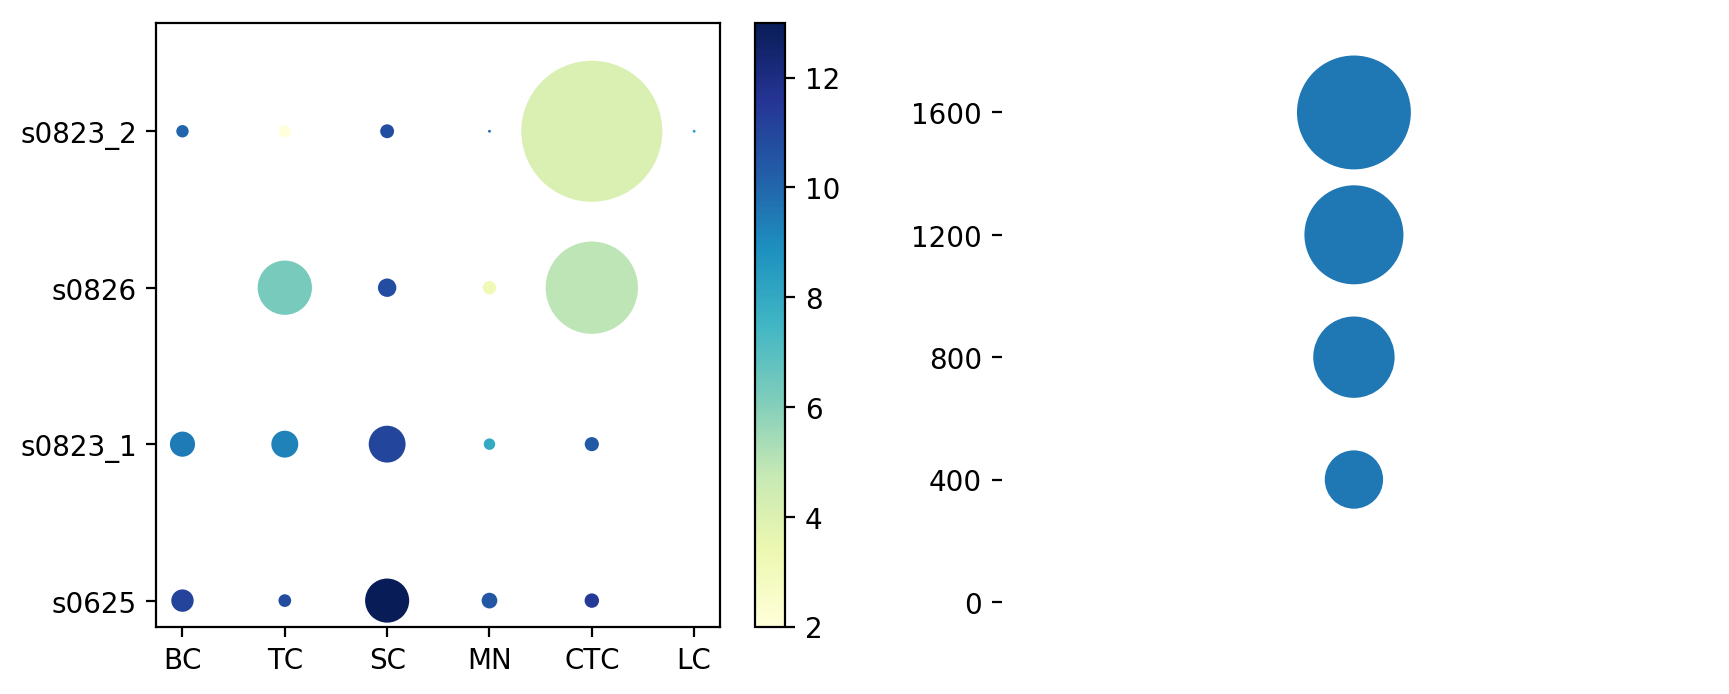

In [51]:
dotplot(rna, tissue_labels, patient_labels)

# qc flow

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
with open('../output/qc_flow_summary/all_flow.list') as input:
    samples = input.readlines()
    samples = [el[2:-9] for el in samples]
samples=sorted(samples)

In [66]:
columns = ['raw','trimmed', 'bc_parsed','splited','exp','sample','datatype']
frac_prefix=pd.DataFrame()

for s in samples:
    df=pd.read_csv('../output/'+s+'/qc_flow/frac_prefix.txt',sep='\t', header=0, index_col=0)
    df['exp']=s
    df['sample']=df.index
    if s.endswith('R') or s.endswith('RNA') or s.endswith('RF'):
        datatype='RNA'
    else:
        datatype='ATAC'
    df['datatype']=datatype
    frac_prefix = frac_prefix.append(df)
frac_prefix=frac_prefix[columns]

/Share2/home/zhangqf5/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [67]:
frac_prefix2=pd.melt(frac_prefix, id_vars=['exp','sample','datatype'], 
                     value_vars=['raw','trimmed','bc_parsed','splited'], var_name='stats', value_name='fraction')

(-0.05, 1.05)

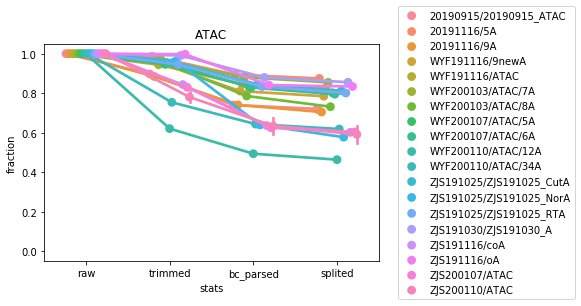

In [73]:
g = sns.pointplot(x="stats", y="fraction",hue="exp", col="time",
                  data=frac_prefix2[frac_prefix2['datatype']=='ATAC'], 
                  kind="point",dodge=True,height=4, aspect=.7)
g.legend(loc='center right', bbox_to_anchor=(1.6, 0.5), ncol=1)
plt.title('ATAC')
plt.ylim(-0.05,1.05)

Text(0.5, 1.0, 'RNA')

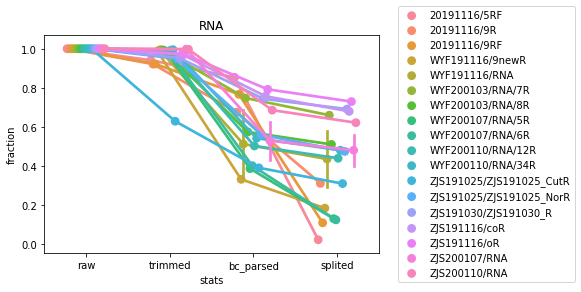

In [50]:
g = sns.pointplot(x="stats", y="fraction",hue="exp", col="time",
                  data=frac_prefix2[frac_prefix2['datatype']=='RNA'], 
                  kind="point",dodge=True,height=4, aspect=.7)
g.legend(loc='center right', bbox_to_anchor=(1.6, 0.5), ncol=1)
plt.title('RNA')

In [69]:
columns = ['total_reads','splited_reads','mapped','rm_chrM','usable_reads','exp','sample','datatype']
frac_sample=pd.DataFrame()

for s in samples:
    df=pd.read_csv('../output/'+s+'/qc_flow/frac_sample.txt',sep='\t', header=0, index_col=0)
    df['exp']=s
    df['sample']=df.index
    if s.endswith('R') or s.endswith('RNA') or s.endswith('RF'):
        datatype='RNA'
    else:
        datatype='ATAC'
    df['datatype']=datatype
    frac_sample = frac_sample.append(df)
frac_sample=frac_sample[columns]

/Share2/home/zhangqf5/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [61]:
frac_sample.head()

,total_reads,splited_reads,mapped,rm_chrM,usable_reads,exp,sample,datatype
CTC,1.0,0.976,0.762,0.699,0.652,20190915/20190915_ATAC,CTC,ATAC
TC,1.0,0.969,0.603,0.327,0.280,20190915/20190915_ATAC,TC,ATAC
MN,1.0,0.974,0.806,0.755,0.708,20190915/20190915_ATAC,MN,ATAC
BC,1.0,0.976,0.109,0.069,0.062,20190915/20190915_ATAC,BC,ATAC
LN,1.0,0.977,0.164,0.109,0.097,20190915/20190915_ATAC,LN,ATAC


In [70]:
frac_sample2=pd.melt(frac_sample, id_vars=['exp','sample','datatype'], 
                     value_vars=['total_reads','splited_reads','mapped','rm_chrM','usable_reads'], 
                     var_name='stats', value_name='fraction')

(-0.05, 1.05)

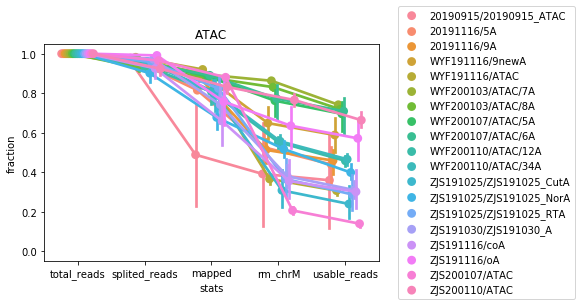

In [74]:
g = sns.pointplot(x="stats", y="fraction",hue="exp", col="time",
                  data=frac_sample2[frac_sample2['datatype']=='ATAC'], 
                  kind="point",dodge=True,height=4, aspect=.7)
g.legend(loc='center right', bbox_to_anchor=(1.6, 0.5), ncol=1)
plt.title('ATAC')
plt.ylim(-0.05,1.05)

Text(0.5, 1.0, 'RNA')

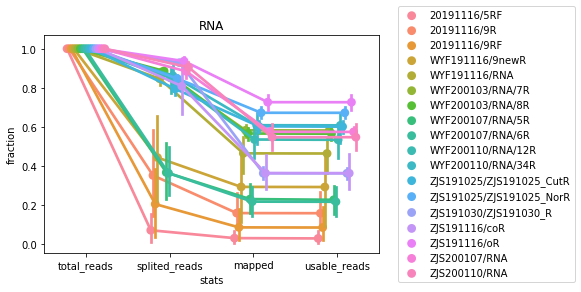

In [59]:
frac_sample2=pd.melt(frac_sample, id_vars=['exp','sample','datatype'], 
                     value_vars=['total_reads','splited_reads','mapped','usable_reads'], 
                     var_name='stats', value_name='fraction')
g = sns.pointplot(x="stats", y="fraction",hue="exp", col="time",
                  data=frac_sample2[frac_sample2['datatype']=='RNA'], 
                  kind="point",dodge=True, height=4, aspect=.7)
g.legend(loc='center right', bbox_to_anchor=(1.6, 0.5), ncol=1)
plt.title('RNA')